# The Sparks Foundation _______ GRIPMAY'21

## Author: Fasiha Fatma 

## Task 1: Prediction using supervised ML 

##### In this task ,have to implement linear regression because there are two variables.Aim to  predict the score of  a student studies for 9.25 hrs/ day.

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

##  Step 1 : Import dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#### Understanding of dataset

In [3]:
# It shows the first 5 rows of dataset
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#This method gives information like no of rows and columns in the dataset along with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#This  method is used to view the statistical summary of all the numerical cols in the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Step 2 : Preprocessing of dataset

In [6]:
# To Check  any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

## Step 3 : Visualization of data

Text(0.5, 1.0, 'Relationship between Hours and Scores')

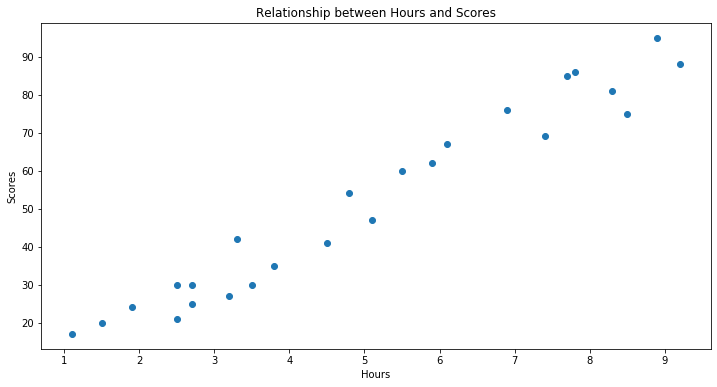

In [7]:
#displays a scatter plot between Scores and Hours attribute
plt.figure(figsize=(12,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Relationship between Hours and Scores')

## Step 4 :Separation of data

In [8]:
X = df['Hours']
y = df['Scores']

In [9]:
#test_size=0.3 states that 30% of the total data is included in test set.
#data is splitted into train and test data where test data is 30%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Step 5: Training of Model

In [10]:
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
print(f'Coefficient: {model.coef_}')
print(f'Y-intercept: {model.intercept_}')

Coefficient: [9.96651548]
Y-intercept: 2.1024930747922284


#### Visualization of model

Text(0, 0.5, 'Scores')

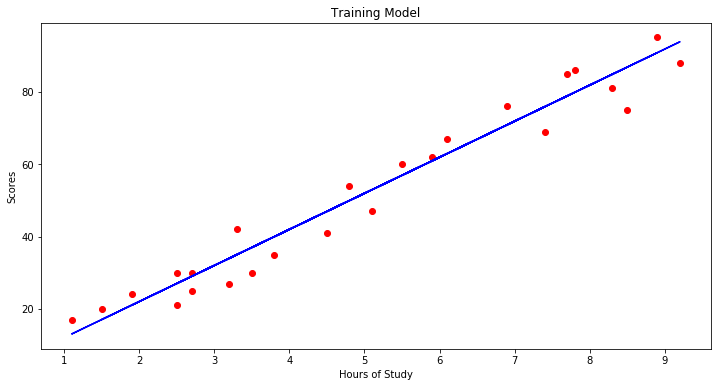

In [12]:
plt.figure(figsize=(12,6))
line = model.coef_*X+model.intercept_
plt.scatter(X,y,color = 'red')#plotting actual training set
plt.plot(X,line,color = 'blue')#plotting the line our model has created 
plt.title('Training Model')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')

#### Predicted Output 

In [16]:
pred = model.predict(X_test.values.reshape(-1,1))

#### Comparison of actual and predicted output

In [17]:
results = pd.DataFrame({"Actual":y_test,'Predicted':pred})
results

,Actual,Predicted
16,30,27.018782
10,85,78.844662
22,35,39.975252
19,69,75.854708
7,60,56.918328
21,54,49.941767
2,27,33.995343
3,75,86.817875


#### Visualization of predicted and actual outputs

Text(0, 0.5, 'Scores')

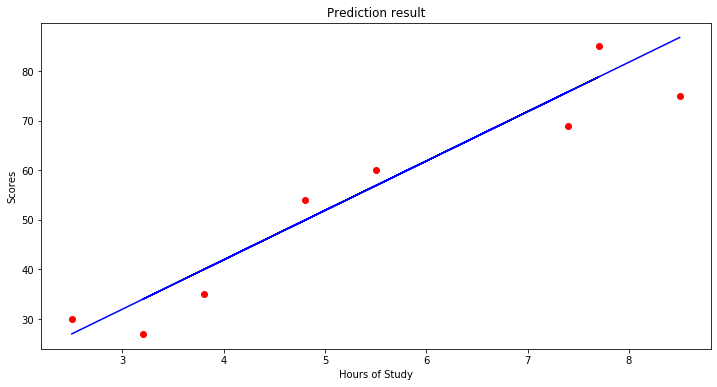

In [18]:
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color = 'red')#plotting actual test set
plt.plot(X_test,pred,color = 'blue')#plotting predicted values 
plt.title('Prediction result')
plt.xlabel('Hours of Study')
plt.ylabel('Scores')

## Step 6 : Our Aim or Answer of question

In [19]:
new_pred = model.predict([[9.25]])
new_pred

array([94.29276126])

 ### So ,If a person or student reads 9.25 hours then the estimated marks he/she can get is 94

##  Step 7: Evaluation of model

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2score: ',r2_score(y_test,pred))
print('mae:',mean_absolute_error(y_test,pred))
print('mse:',mean_squared_error(y_test,pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,pred)))

r2score:  0.8999124290533055
mae: 5.864954643694258
mse: 41.63486564552886
rmse: 2.4217668433799027


#### Observations and Conclusions

##### 1 :mae, mse,rmse are all loss functions and should be minimized
##### 2 : r^2 score is pretty good here which is 0.89
##### 3 : If a student reads 9.25 hours per day then he can score 94 marks and this is prediction through model